<a href="https://colab.research.google.com/github/chikelu/Godson_Portfolio/blob/main/mobile_phone_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import data libraries
import pandas as pd
import numpy as np
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# use the display package to show multiple output items
from IPython.display import display



In [ ]:
# import data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mobile phone price prediction.csv',index_col=0)
df_copy = df.copy()
df

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,TCL 40R,4.05,75,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP + 2 MP Triple Rear &amp; 8 MP Fro...,Memory Card (Hybrid),12,"18,999",TCL,64 GB inbuilt,15W Fast Charging,720 x 1612 px,Octa Core,Dimensity 700 5G
1366,TCL 50 XL NxtPaper 5G,4.10,80,"Dual Sim, 3G, 4G, VoLTE,",8 GB RAM,5000 mAh Battery,6.8 inches,50 MP + 2 MP Dual Rear &amp; 16 MP Front Camera,Memory Card (Hybrid),14,"24,990",TCL,128 GB inbuilt,33W Fast Charging,1200 x 2400 px,Octa Core,Dimensity 7050
1367,TCL 50 XE NxtPaper 5G,4.00,80,"Dual Sim, 3G, 4G, 5G, VoLTE,",6 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 16 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"23,990",TCL,256 GB inbuilt,18W Fast Charging,720 x 1612 px,Octa Core,Dimensity 6080
1368,TCL 40 NxtPaper 5G,4.50,79,"Dual Sim, 3G, 4G, 5G, VoLTE,",6 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 1 TB",13,"22,499",TCL,256 GB inbuilt,15W Fast Charging,720 x 1612 px,Octa Core,Dimensity 6020


In [ ]:
# prompt: Using dataframe df: drop df index row

df = df.reset_index(drop=True) # Reset the index and drop the old index column


In [ ]:
display(df.head())
display(df.info())

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


<class 'pandas.core.frame.DataFrame'>
Index: 1370 entries, 0 to 1369
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1370 non-null   object 
 1   Rating             1370 non-null   float64
 2   Spec_score         1370 non-null   int64  
 3   No_of_sim          1370 non-null   object 
 4   Ram                1370 non-null   object 
 5   Battery            1370 non-null   object 
 6   Display            1370 non-null   object 
 7   Camera             1370 non-null   object 
 8   External_Memory    1370 non-null   object 
 9   Android_version    927 non-null    object 
 10  Price              1370 non-null   object 
 11  company            1370 non-null   object 
 12  Inbuilt_memory     1351 non-null   object 
 13  fast_charging      1281 non-null   object 
 14  Screen_resolution  1368 non-null   object 
 15  Processor          1342 non-null   object 
 16  Processor_name     1370 non-n

None

In [ ]:
# remove the "," character from Price
df['Price'] = df['Price'].str.replace(',', '')
# convert the data type to float
df['Price'] = df['Price'].astype(float)

In [ ]:
df.describe()

,Rating,Spec_score,Price
count,1370.000000,1370.000000,1370.000000
mean,4.374416,80.234307,33436.740876
std,0.230176,8.373922,30452.065430
min,3.750000,42.000000,6950.000000
25%,4.150000,75.000000,12990.000000
50%,4.400000,82.000000,21999.000000
75%,4.550000,86.000000,42990.000000
max,4.750000,98.000000,214990.000000


In [ ]:
# move Price as the last column
cols = list(df.columns)
cols.remove('Price')
cols.append('Price')
df = df[cols]

In [ ]:
# data shape
display(df.shape)

(1370, 17)

In [ ]:
# use prettytable to show dataframe
from ipywidgets import *
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = list(df.columns)
pt.add_row(df.iloc[0])
print(pt)

+-----------------------+--------+------------+-------------------------------+----------+-------------------+------------+-------------------------------------------------+----------------------------------+-----------------+---------+-----------------+--------------------+-----------------------------------------------+----------------------+----------------+--------+
|          Name         | Rating | Spec_score |           No_of_sim           |   Ram    |      Battery      |  Display   |                      Camera                     |         External_Memory          | Android_version | company |  Inbuilt_memory |   fast_charging    |               Screen_resolution               |      Processor       | Processor_name | Price  |
+-----------------------+--------+------------+-------------------------------+----------+-------------------+------------+-------------------------------------------------+----------------------------------+-----------------+---------+-----------------+

In [ ]:
# print list of null %count
df.isnull().sum()/len(df)*100

Name                  0.000000
Rating                0.000000
Spec_score            0.000000
No_of_sim             0.000000
Ram                   0.000000
Battery               0.000000
Display               0.000000
Camera                0.000000
External_Memory       0.000000
Android_version      32.335766
company               0.000000
Inbuilt_memory        1.386861
fast_charging         6.496350
Screen_resolution     0.145985
Processor             2.043796
Processor_name        0.000000
Price                 0.000000
dtype: float64

In [ ]:
 # drop column Andriod_version has llot of nulls
 #df.drop('Android_version', axis=1, inplace=True)
 # drop rows with nulls
 df.dropna(inplace=True)


In [ ]:
# find duplicate rows in df
df.duplicated().sum()

0

In [ ]:
print(df.isnull().sum())   # After dropping the values

Name                 0
Rating               0
Spec_score           0
No_of_sim            0
Ram                  0
Battery              0
Display              0
Camera               0
External_Memory      0
Android_version      0
company              0
Inbuilt_memory       0
fast_charging        0
Screen_resolution    0
Processor            0
Processor_name       0
Price                0
dtype: int64


In [ ]:
from ipywidgets import *
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = list(df.columns)
pt.add_row(df.iloc[0])
print(pt)

+-----------------------+--------+------------+-------------------------------+----------+-------------------+------------+-------------------------------------------------+----------------------------------+-----------------+---------+-----------------+--------------------+-----------------------------------------------+----------------------+----------------+--------+
|          Name         | Rating | Spec_score |           No_of_sim           |   Ram    |      Battery      |  Display   |                      Camera                     |         External_Memory          | Android_version | company |  Inbuilt_memory |   fast_charging    |               Screen_resolution               |      Processor       | Processor_name | Price  |
+-----------------------+--------+------------+-------------------------------+----------+-------------------+------------+-------------------------------------------------+----------------------------------+-----------------+---------+-----------------+

In [ ]:
#calc the quartile ranges
Q1 = df.Price.quantile(0.25)
Q3 = df.Price.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
dfq = df[(df.Price >= Q1 - 1.5*IQR) & (df.Price <= Q3 + 1.5*IQR)] # remove outlier rows from df
dfq = dfq.reset_index(drop=True)



18000.0


In [ ]:
pt = PrettyTable()
pt.field_names = list(dfq.columns)
for i in range(8):
  pt.add_row(dfq.iloc[i])
print(pt)


+--------------------------------------+--------+------------+-------------------------------+----------+-------------------+------------+----------------------------------------------------------+------------------------------------+-----------------+---------+-----------------+--------------------+-----------------------------------------------+----------------------+----------------+---------+
|                 Name                 | Rating | Spec_score |           No_of_sim           |   Ram    |      Battery      |  Display   |                          Camera                          |          External_Memory           | Android_version | company |  Inbuilt_memory |   fast_charging    |               Screen_resolution               |      Processor       | Processor_name |  Price  |
+--------------------------------------+--------+------------+-------------------------------+----------+-------------------+------------+----------------------------------------------------------+---

# **Plots**

<Axes: xlabel='Price'>

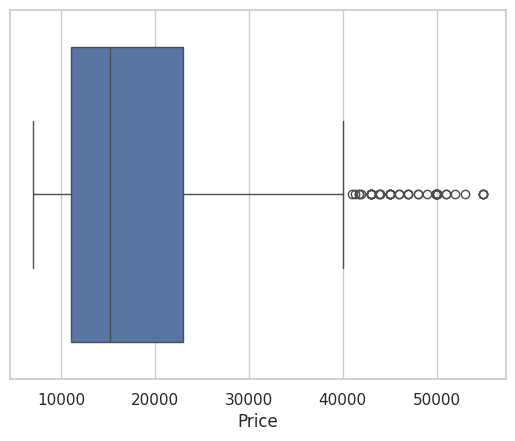

In [ ]:
display(sns.boxplot(dfq['Price'],orient="h"))

<ipython-input-89-16d659c35474>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfq['Price'])


<Axes: xlabel='Price', ylabel='Density'>

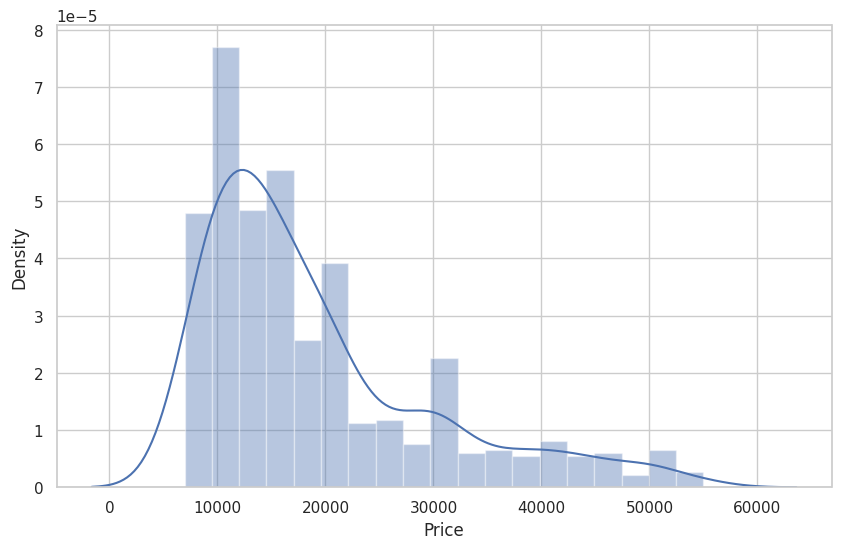

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(dfq['Price'])

In [ ]:
dfq.Brand.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

AttributeError: 'DataFrame' object has no attribute 'Make'

<Axes: xlabel='Android_version'>

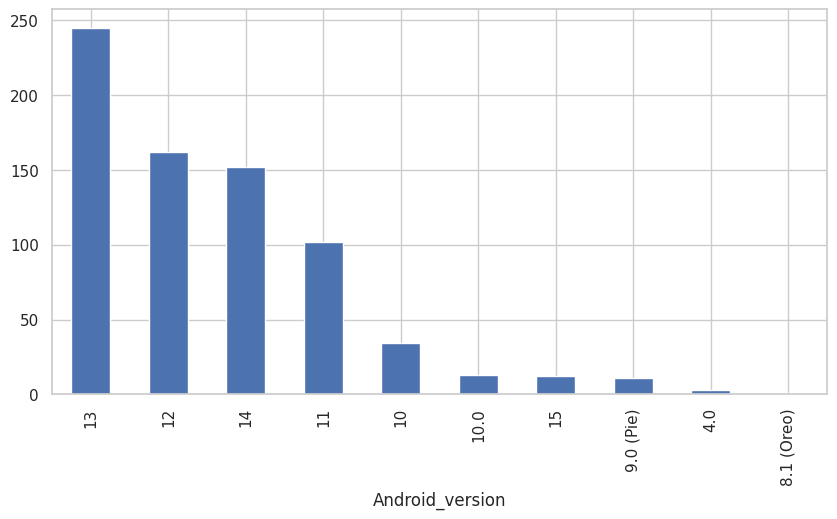

In [ ]:
dfq.Android_version.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='company'>

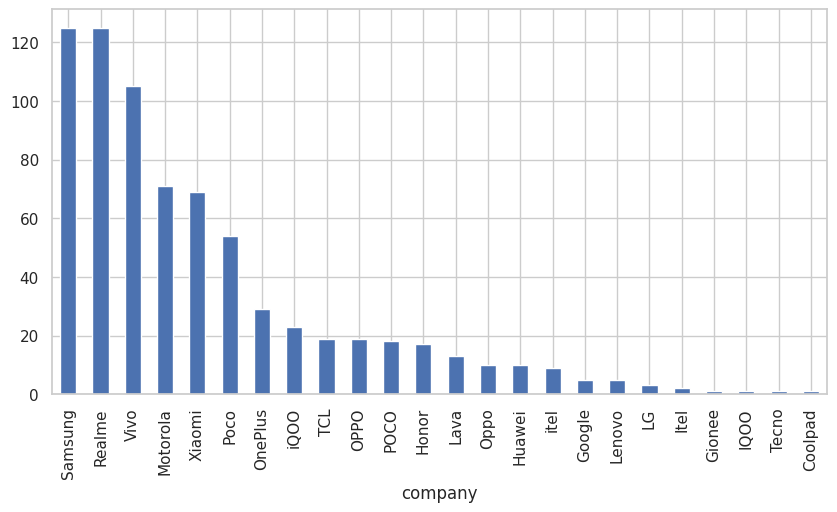

In [ ]:
dfq.company.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5),)